In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from pathlib import Path
import pandas as pd

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/fma_3secs.csv'))
orignial_df

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2-000574.mp3,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
orignial_df_subset = orignial_df[(orignial_df.label == 'Electronic') | (orignial_df.label == 'Experimental')]
orignial_df_subset

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
30,1-000995.mp3,0.700355,0.033330,0.386054,0.000437,2791.009215,33558.066095,2449.923053,3530.138684,5542.729304,...,10.222873,-6.075579,12.552099,-0.371658,10.297073,-6.205947,8.144464,-1.129170,8.997581,Experimental
31,2-000995.mp3,0.685851,0.033443,0.385512,0.000152,2808.883704,23154.953563,2470.737420,1494.536820,5600.289213,...,10.653401,-6.331983,10.903942,-0.412861,9.537299,-6.327381,11.391726,-1.126299,11.927361,Experimental
32,3-000995.mp3,0.703042,0.030243,0.387063,0.000109,2830.777260,9239.652104,2477.625978,1146.387585,5639.711538,...,10.627180,-6.803316,10.563195,-0.997821,11.816387,-6.196778,6.830270,-0.787392,9.634679,Experimental
33,4-000995.mp3,0.695713,0.034511,0.389012,0.000255,2758.032133,14266.837756,2456.067679,1449.193777,5509.932580,...,9.044753,-6.638624,9.668034,-0.262299,8.640195,-6.008530,8.926443,-0.219576,8.778229,Experimental
34,5-000995.mp3,0.685201,0.037320,0.385749,0.000140,2787.040025,20548.826446,2460.933098,1444.596498,5560.866887,...,10.069898,-7.329926,10.443919,-1.009067,11.568584,-5.446752,8.966944,-0.470291,9.857224,Experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79635,6-151404.mp3,0.507340,0.098794,0.220544,0.006686,2740.056766,926923.057412,2698.625631,69623.370055,5916.661659,...,37.913113,-0.858419,19.930033,2.324306,15.504400,-4.313861,21.270437,1.810734,82.258461,Electronic
79636,7-151404.mp3,0.366493,0.090314,0.271126,0.002403,1504.920680,102545.550494,2187.034756,29259.311917,3693.606896,...,83.428581,8.240118,517.451355,7.599144,246.513397,-0.108695,81.248993,8.354340,214.523193,Electronic
79637,8-151404.mp3,0.407270,0.089554,0.265164,0.001688,1213.383052,158604.279798,1945.503972,40612.817268,2550.110990,...,87.638390,-1.652739,87.553429,-3.969990,124.665611,-9.405005,46.182632,17.527910,52.943745,Electronic
79638,9-151404.mp3,0.478208,0.090623,0.304637,0.003495,391.496783,41908.840871,1015.619557,116703.339968,480.687350,...,18.298523,6.693484,13.210431,7.509255,14.323221,4.376837,37.789284,5.625691,47.949467,Electronic


In [4]:
#drop label and filename columns
X = orignial_df_subset.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df_subset['label']
y.unique()

array(['Experimental', 'Electronic'], dtype=object)

In [5]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,mfcc1_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
30,0.700355,0.386054,2791.009215,2449.923053,5542.729304,0.121518,-0.000004,0.000378,112.347147,102.706749,...,-7.479188,0.679351,-5.844813,0.768060,-6.892395,0.280236,-6.075579,-0.371658,-6.205947,-1.129170
31,0.685851,0.385512,2808.883704,2470.737420,5600.289213,0.114908,0.000080,0.000473,135.999178,104.161613,...,-7.553948,0.146059,-5.918819,0.692304,-6.426303,0.190694,-6.331983,-0.412861,-6.327381,-1.126299
32,0.703042,0.387063,2830.777260,2477.625978,5639.711538,0.119257,0.000002,0.000545,123.046875,106.074409,...,-7.066588,0.697823,-6.387706,0.087110,-6.683863,0.461879,-6.803316,-0.997821,-6.196778,-0.787392
33,0.695713,0.389012,2758.032133,2456.067679,5509.932580,0.111249,0.000093,0.000303,129.199219,104.299622,...,-7.719468,-0.264419,-6.823322,0.616482,-6.198241,0.045220,-6.638624,-0.262299,-6.008530,-0.219576
34,0.685201,0.385749,2787.040025,2460.933098,5560.866887,0.113394,0.000033,0.000292,129.199219,104.535858,...,-7.881824,-0.943042,-6.388814,0.784634,-5.968055,-0.021775,-7.329926,-1.009067,-5.446752,-0.470291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79635,0.507340,0.220544,2740.056766,2698.625631,5916.661659,0.119678,-0.000145,0.000286,129.199219,-70.973846,...,2.478737,10.383821,3.250350,8.855648,0.297184,4.961936,-0.858419,2.324306,-4.313861,1.810734
79636,0.366493,0.271126,1504.920680,2187.034756,3693.606896,0.038101,0.000173,-0.000732,135.999178,-137.412674,...,2.181428,12.434233,-1.623768,8.700136,-1.722675,5.243713,8.240118,7.599144,-0.108695,8.354340
79637,0.407270,0.265164,1213.383052,1945.503972,2550.110990,0.028151,0.000147,0.000662,123.046875,-154.625183,...,-2.889584,15.592734,-1.130532,15.748050,-4.471847,-7.876812,-1.652739,-3.969990,-9.405005,17.527910
79638,0.478208,0.304637,391.496783,1015.619557,480.687350,0.006460,0.000275,0.000208,135.999178,-266.293335,...,11.644982,22.757956,14.016176,11.379431,3.905983,1.607673,6.693484,7.509255,4.376837,5.625691


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### with scaled data

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.942
k: 3, Train/Test Score: 0.969/0.922
k: 5, Train/Test Score: 0.948/0.907
k: 7, Train/Test Score: 0.929/0.892
k: 9, Train/Test Score: 0.912/0.878
k: 11, Train/Test Score: 0.898/0.870
k: 13, Train/Test Score: 0.886/0.856
k: 15, Train/Test Score: 0.874/0.845
k: 17, Train/Test Score: 0.865/0.837
k: 19, Train/Test Score: 0.852/0.830


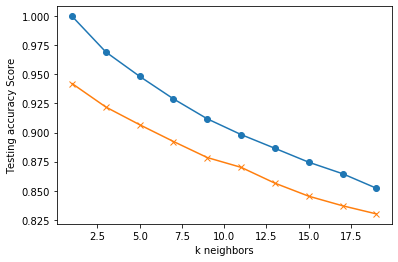

In [8]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.922


In [10]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
43543,Electronic,Electronic
18725,Electronic,Experimental
25068,Experimental,Experimental
31318,Electronic,Experimental
70402,Experimental,Experimental
...,...,...
15449,Experimental,Experimental
42740,Experimental,Experimental
54733,Electronic,Electronic
68086,Experimental,Experimental


### with unscaled data

k: 1, Train/Test Score: 1.000/0.745
k: 3, Train/Test Score: 0.865/0.748
k: 5, Train/Test Score: 0.822/0.742
k: 7, Train/Test Score: 0.802/0.741
k: 9, Train/Test Score: 0.787/0.736
k: 11, Train/Test Score: 0.776/0.737
k: 13, Train/Test Score: 0.770/0.737
k: 15, Train/Test Score: 0.764/0.732
k: 17, Train/Test Score: 0.758/0.731
k: 19, Train/Test Score: 0.755/0.729


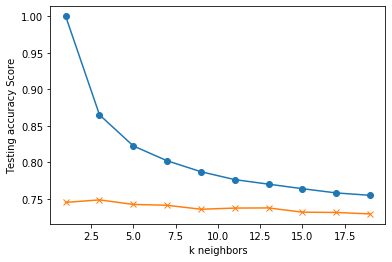

In [11]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()